In [11]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad,odeint
from scipy.optimize import fsolve
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

### 5 Coupled equations

Similar numerical methods to those used for single equations can be used to solve coupled or simultaneous ones. Coupled reactions are commonly found in chemical kinetics, MD simulations, enzyme kinetics, and catalysis; also in the decay of radioactive atoms as well as in the spread of diseases and the predator - prey type behaviour of animals. In each case, species interact or convert into one another and at least two differential equations are needed to describe this. In many cases, these sets of equations cannot be solved algebraically and a numerical method has therefore to be used. As an example, we deliberately start with a pair of equations that can be solved analytically, and this will allow comparison of the numerical solution with the algebraic one. The equations are

$$\displaystyle \frac{dy}{dt}=\cos(t)-x \qquad \frac{dx}{dt}=\sin(t)-1-y  \tag{32}$$

subject to the initial condition $x(t_0) = 1,\; y(t_0) = -3$ when $t_0 = 0$. Notice that the first equation $dy/dt = \cdots$ is a function of $x$ and $t$ and the second a function of $y$ and $t$ but in general $dy/dt$ and $dx/dt$ could be functions of $x$, $y$, and $t$. These equations can be solved algebraically using the method of operators (Chapter 10.4) by making a second-order equation out of the pair and the solutions are $y = \sin(t) - \sinh(t) - 1 - 2 \cosh(t)$ and $x = \cosh(t) + 2 \sinh(t)$. These functions are plotted in Fig. 11 as dashed lines. The result of a modified Euler integration using Algorithm 15 from $t = 0 \cdots 3$ is also shown as the solid lines with $N = 200$ steps.

<img src='num-methods-fig11.png' alt='Drawing' style='width:400px;'/>

Figure 11. The algebraic solution to the two equations (32) (dashed lines) over the range $-4 \to 4$ and the modified Euler numerical solution (solid line) with $200$ steps over the range $t = 0 \to 3$.

______

The code shown below for the calculation is similar to that in Algorithm 9, except that two functions are defined and both $x$ and $y$ are incremented. The modified Euler method can be used just as easily as with a single equation, but for clarity, the simpler method is illustrated.

In [12]:
# Algorithm 14   Euler's method for coupled equations

dydt = lambda t,x : np.cos(t) - x        # eqns 32
dxdt = lambda t,y : np.sin(t) - 1 - y

t0 = 0.0
maxt = 2.0
x0 = 1
y0 = -3
n  = 200

Eulery = np.zeros(n,dtype=float)   # define arrays to hold results
Eulerx = np.zeros(n,dtype=float)
dtime  = np.zeros(n,dtype=float)

h = (maxt - t0)/n
x = x0
y = y0
t = t0
Eulery[0] = y0
Eulerx[0] = x0
dtime[0]  = t0
for i in range(1,n):
    y = y + h*dydt(t,x)
    x = x + h*dxdt(t,y)
    t = t + h
    Eulery[i] = y
    Eulerx[i] = x
    dtime[i]  = t
    pass


## 5.1 Modified Euler and Runge - Kutta equations

The Euler method for coupled equations can be improved in the same way as for equation (23). The resulting equations with which to calculate $dy/dt = f (t, x, y)$ and $dx/dt = g(t, x, y)$ are changed from

$$\displaystyle  y_{n+1} = y_n + hf(t_n,x_n,y_n) \qquad \text{and} \qquad x_{n+1} = x_n + hg(t_n,x_n,y_n)$$

to

$$\displaystyle  y_{n+1} = y_n + \frac{h}{2}[f(t_n,x_n,y_n) + f(t_n+h, x_n+hg(t_n,x_n,y_n), y_n+hf(t_n,x_n,y_n))]$$

$$\displaystyle  x_{n+1} = x_n + \frac{h}{2}[g(t_n,x_n,y_n) +  g(t_n+h, x_n+hg(t_n,x_n,y_n), y_n+hf(t_n,x_n,y_n))  ]$$

which is much more clearly written out as 

$$\displaystyle \begin{array}{ll}
\displaystyle x_{n+1} = x_n+\frac{h}{2}(L_1+L_2) & \displaystyle y_{n+1} = y_n+\frac{h}{2}(k_1+k_2) \\[10pt]
\displaystyle k_1=f(t_n,x_n,y_n) & \displaystyle L_1=g(t_n,x_n,y_n)\\[10pt]
\displaystyle k_2=f(t_n+h, x_n+hL_1, y_n+hk_1) & \displaystyle L_2=g(t_n+h, x_n+hL_1, y_n+hk_1)\\
\end{array} \tag{33}$$

This can be translated quite easily into Python, because only the part within the for loop is changed. The rest is based on algorithm 14.

In [13]:
#Algorithm 15   Heun's or modified Euler for coupled equations

dydt = lambda t,x,y : np.cos(t) - x        # eqns 32 it does not matter that y is not present
dxdt = lambda t,x,y : np.sin(t) - 1 - y    

for i in range(1,n):
    k1 = dydt(t,x,y)
    L1 = dxdt(t,x,y)
    k2 = dydt(t+h,x+L1*h, y+k1*h)
    L2 = dxdt(t+h,x+L1*h, y+k1*h)
    
    y = y + h*(k1+k2)/2
    x = x + h*(L1+L2)/2
    t = t + h
    Eulery[i] = y
    Eulerx[i] = x
    dtime[i]  = t
    pass

The Runge - Kutta method can also be used with coupled equations in a similar way as in the last algorithm; notice how the $k$'s are defined in terms of $dydt$ and add to terms in $y$ and $L$'s to those in $x$. Based on Algorithm 11 the modified equations are only in the for loop. 

In [14]:
# Algorithm 16     Runge - Kutta fourth order (RK4)  method for coupled equations.
for i in range(1,n):
    k1 = dydt(t,x,y)
    L1 = dxdt(t,x,y)
    
    k2 = dydt(t+h/2,x+L1*h/2, y+k1*h/2)
    L2 = dxdt(t+h/2,x+L1*h/2, y+k1*h/2)
    
    k3 = dydt(t+h/2,x+L2*h/2, y+k2*h/2)
    L3 = dxdt(t+h/2,x+L2*h/2, y+k2*h/2)
    
    k4 = dydt(t+h,x+L3*h, y+k3*h)
    L4 = dxdt(t+h,x+L3*h, y+k3*h)
    
    y = y + h*(k1+2*k2+2*k3+k4)/6
    x = x + h*(L1+2*L2+2*L3+L4)/6
    t = t + h
    Eulery[i] = y
    Eulerx[i] = x
    dtime[i]  = t
    pass

### 5.2 Second and higher order differential equations. The Numerov algorithm and the Schroedinger equation. 

The most important second order equation you will meet is most likely to be the Schroedinger equation. The numerical solution to find the energy (eigenvalues) of this is dealt with in section 9 of this chapter but the Numerov algorithm used to calculate the wavefunction is described below after the general solution of other second order equations  is described.

Second and higher order equations can be easily reduced to a set of first-order equations and solved as coupled equations. Second-order equations can also be converted directly into difference equations for numerical evaluation and, in some cases, such as with the diffusion equation, this is the most convenient way to solve them.

The equation

$$\displaystyle  \frac{d^2y}{dx^2}+3\frac{dy}{dx}+5y=0 \tag{34}$$

is second order and can be solved algebraically making possible a comparison with a numerical method. Suppose that the initial conditions are $y_0 = 0$ and $dy/dx|_0 = 1$. These mean that the value of $y$ at $x = 0$ is zero, and that the gradient, also at $x = 0$, is one. The strategy is to take the lowest derivative $dy/dx$, even if it is not explicitly present in the equation, and make this equal to a new variable $z$; for instance, $z = dy/dx$. The equation now becomes

$$\displaystyle \frac{dy}{dz}=z; \qquad \frac{dz}{dx}=-3z-5y \tag{35}$$

As a check, by substitution the original equation is reformed. The equations, initial values, and the Euler method based on that in Algorithm 14 are written as:

In [15]:
dydx = lambda   z: z
dzdx = lambda y,z: -3*z - 5*y 
y0 = 0
z0 = 1
x0 = 0

and in the for loop the increments for $x$ and $y$ are similar to those used previously. The numerical result is shown in Fig. 12 with $200$ points used in the numerical integration, together with the algebraic solution shown as the dashed line. A fairly good fit to the algebraic line is obtained, but to improve this, more points could be used in the integration or a better integration method used, such as illustrated in Algorithm 15. The algebraic solution can be found using SymPy, and has the form of an exponentially damped sine wave.

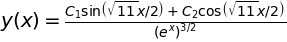

In [25]:
x,y,C1,C2 = symbols(' x y C1 C2')
y = Function('y')
eq = diff(y(x),x,x)+3*diff(y(x),x)+5*y(x)
ans= dsolve(eq,y(x))
ans

Including the initial condition $y(0)=0,\,x=0$ produces $C_2=0$. The derivative is $1$ at $x=0$,

In [21]:
dydx = diff( exp(-3*x/2)*C1*sin(sqrt(11)*x/2),x)
simplify(dydx)

and when $x=0,\;dy/dx=1=C_1\sqrt{11}/2$ thus

$$\displaystyle y=\frac{2}{\sqrt{11}}e^{-3x/2}\sin\left(\frac{\sqrt{11}x}{2}\right)$$

<img src='num-methods-fig12.png' alt='Drawing' style='width:400px;'/>

Figure12 Numerical (solid line) and algebraic solution to equation 34.
_____

### Higher order equations

The higher order equation

$$\displaystyle  \frac{d^3y}{dx^3}+a\frac{d^2y}{dx^2}-y=0 $$

can similarly be reduced to a number of first-order equations by making substitutions. Two substitutions are needed here because of the third-order derivative. These can be $dy/dx=z,\; dz/dx=w,\; dw/dx=-aw+y$, and the substitutions have the following effect, $dw/dx = d^2z/dx^2 = d^3y/dx^3$ and $w = dz/dx = d^2y/dx^2$. The initial conditions must also be specified before a solution can be found. In this case, there are, in effect, three integration steps because of the third power of the derivative. The three initial conditions must specify, at the initial $x$ chosen, a value of $y, \;dy/dt$ and $d^2y/dt^2$.


### 5.2.1 The Numerov method

The conventional Numerov method is used to solve second-order differential equations which do not have a first derivative and are of the form 

$$\displaystyle \frac{d^2y}{dx^2} + f(x)y = s(x)  \tag{35a}$$

and is therefore a suitable method to use for the numerical solution of the Schroedinger equation and of Poisson's equation. The solution results in a recursive equation that is simple to implement, involves fewer function evaluations that does the Runge-Kutta method and has precision of $h^6$.

The Schroedinger equation is solved next. There are other methods that are used such as the Shooting Method and expansion in a basis set. The shooting method is described in section 9 of this chapter. 

The  Schroedinger equation is normally written as 

$$\displaystyle -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx} +  V(x)\psi(x) = E\psi(x)  \tag{35b} $$

where  $V(x)$ represents the potential energy, a quadratic, for example, in a harmonic oscillator. Rearranging this  gives $\displaystyle\frac{d^2\psi(x)}{dx} -\frac{2m}{\hbar^2}\left(V(x)-E\right)\psi(x)=0$ in which case when put in the form of equation 35a, $\displaystyle f(x)=-\frac{2m}{\hbar^2}\left(V(x)-E\right)$ and $s(x)=0$. 

Note that the each  energy eigenvalue $E$ must be known before its wavefunction $\psi$ can be calculated.  The Shooting method described in section 9 can be used to find these. 

The Poisson equation of electromagnetism also has the form of equation 35a, i.e. $\displaystyle \frac{d^2\varphi}{dx^2}=-4\pi\rho(x)$ where $\rho(x)$ is charge density. In this case $f(x)=0;\; s=-4\pi\rho(x)$.

The essential part of the Numerov algorithm is to produce a numerical version of $d^2y/dx^2$ and this is done by expanding $y$ as a Taylor series i.e. expand $y$ about a point $x_0=x+h$, where $h$c is a small increment in $x$, and then about $x-h$ and adding the two series. The result produces an expression in the second and fourth derivatives $y'',\; y'''' $. On rearranging the second derivative of obtained but it also contains the fourth derivative. This is next evaluated by acting on the original equation with the operator $(1+d^2y/dx^2)$. 

The calculation is done over a grid  of points, just as in the Euler and Runge - Kutta methods and where $h$ represents the increment in $x$. Instead of using $x+h$ some authors use $x_n$ to represent the $n^\text{th}$ point; we convert to this notation at the end of the derivation.

The Taylor expansion of a function $y$ centered around $x_0$ is (see chapter 5.6) 

$$\displaystyle y(x)=y(x_0)+(x-x_0)y'+\frac{(x-x_0)^2}{2!}y''+\frac{(x-x_0)^3}{2!}y'''+\frac{(x-x_0)^4}{4!}y''''+\cdots + \frac{(x-x_0)^n}{n!}y^n+\cdots$$ 

where the derivatives $y'\;y''$ etc are each evaluated at $x_0$. When expanded about $h=x - x_0$ where $h$ is small compared to $x$  produces

$$\displaystyle y(x_0+h)=y(x_0)+hy'+\frac{h^2}{2!}y''+\frac{h^3}{2!}y'''+\frac{h^4}{4!}y''''+\cdots $$ 

but for clarity as $x_0$ can be any point $x$ we make the notational change $x_0 \to x$ so that the last equation becomes

$$\displaystyle y(x+h)=y(x)+hy'+\frac{h^2}{2!}y''+\frac{h^3}{2!}y'''+\frac{h^4}{4!}y''''+\cdots $$ 

and similarly changing $h \to -h$

$$\displaystyle y(x-h)=y(x)-hy'+\frac{h^2}{2!}y''-\frac{h^3}{2!}y'''+\frac{h^4}{4!}y''''+\cdots $$

Limiting the expansion to the fourth power and adding the last two equations produces

$$\displaystyle y(x+h)+y(x-h) =2y(x)+h^2y''+2\frac{h^4}{4!}y''''   +O(h^6)\tag{35c}$$ 

which gives a recursive equation if  the two derivatives $y''$ and $ y''''$ can be found. The second derivative is defined from the original equation and the fourth order derivative can be obtained by differentiating both sides of this equation (eqn 35a) 

$$\displaystyle \frac{d^2y}{dx^2} \equiv y''=- f(x)y + s(x)$$ 

twice and expanding terms as above, but only to second powers in $y$. As the differentiation will involve products, because both $f$ and $y$ are functions of $x$, it is simpler to define a new function $g(x) = -f(x)y(x)+s(x)$, making the original equation (35a) $y''=g(x)$ and expand this just as was done above for $y$ to find the second derivative. Doing this using in the same way that produced equation 35c but ignoring the forth power term gives 

$$\displaystyle y'''' \equiv g'' = \frac{g(x+h) -2g(x)+  g(x-h)  }{ h^2} +O(h^2)$$ 

This can now be substituted into the  equation 35c to produce

$$\displaystyle y(x+h) = 2y(x) -  y(x-h)  + h^2g(x) + \frac{h^4}{12}\left(\frac{g(x+h) -2g(x)+  g(x-h)  }{ h^2}\right) +O(h^6)$$ 

Simplifying and replacing $g(x)$ with  $-f(x)y(x)+s(x)$ gives

$$\displaystyle y(x+h)\left(1+\frac{h^2}{12}f(x+h)\right)= 2y(x)\left( 1-\frac{5h^2}{12}f(x) \right) -y(x-h)\left(1+\frac{h^2}{12}f(x-h)  \right) +\left( s(x+h)+10s(x) +s(x-h)\right )\frac{h^2}{12} \tag{35d}$$

In the specific case of the Schroedinger equation $s(x)=0$ and then

$$\displaystyle y(x+h)\left(1+\frac{h^2}{12}f(x+h)\right)= 2y(x)\left( 1-\frac{5h^2}{12}f(x) \right) -y(x-h)\left(1+\frac{h^2}{12}f(x-h)  \right) $$


Writing this in terms of indices as required in an algorithm means making the changes $y(x+h) \to y_{n+1},\; y(x) \to f_n,\; y(x-h) \to y_{n-1}$

$$\displaystyle y_{n+1}\left(1+\frac{h^2}{12}f_{n+1}\right)= 2y_n\left( 1-\frac{5h^2}{12}f_n \right) -y_{n-1}\left(1+\frac{h^2}{12}f_{n-1}  \right) \tag{ 35e}$$

which means that $y$ must be known at two points, $n$ and $n+1$ at the start of the calculation. Normally starting at large $x$ values relative to the minimum of the potential means that here the wavefunctuon is zero and so initial values such as  $y_0 =0 ,\;y_1 = 0.001$ can be used. The wavefunction can be normalised at the end of the calculation ($\int\psi dx=1$) so these values are not critical. The function $f$ is known at all points via $V(x)$  but as noted the eigenvalue $E$ must be known. Note also the sign of $f(x)$ when using the Schroedinger equation $\displaystyle f(x)= -\frac{2m}{\hbar^2}\left(V(x)-E\right)$.  

As an example calculation, the wavefunction of a quantum harmonic oscillator with $V= (k/2)x^2$ is calculated using  constants $\mu=1,\;\hbar = 1,\; k = 20 $. The eigenvalues are $\displaystyle E_n=\hbar \sqrt{\frac{k}{\mu} }\left(n+\frac{1}{2}\right)$. This method does not perform well when,for example, the potential has a double well and in conjunction with the shooting method because numerical precision becomes an issue. In this case more sophisticated algorithms are needed. These are usually the ones that are provided by the computer language you use, 'odeint' in Python/Scipy for example.

In [31]:
# Numerov Algorithm 11.16a

def numerov(V,x,E0):
    
    n = len(x)                                   # number of data points
    y = np.zeros(n,dtype = float)                # make array for wavefunction y
    f = lambda x: -2.0*mu/hbar**2*(V(x) - E0)    # calculate function f 
    h = (x[1]-x[0])                              # increment in x

    y[0] = 0.0                                   # guess two starting values 
    y[1] = 0.001
    q = h**2/12.0                                # define once outside loop
    for i in range(2,n):
        y[i] = ( 2*y[i-1]*(1-5*q*f(x[i-1])) - y[i-2]*(1+q*f(x[i-2])) )/ (1 + q*f(x[i]) )  # eqn 35e
    return y
#------------

num = 1001                    # number of data points, odd so that there is a point at x=0
xn  = 3.0                     # +- x extent of potential V
x   = np.linspace(-xn,xn,num) # make array of x values  

n  = 2                        # quantum number 
k  = 20.0                     # force constant
hbar= 1.0                     # define constants
mu  = 1.0
E0  = hbar*np.sqrt(k/mu)*(n+1/2)   # eigenvalue 

V = lambda x :0.5*k*x**2      # potentiual 

y = numerov(V,x,E0)           # calculate wavefunction

#plt.plot(x,y)
#plt.show()

<img src='num-methods-fig11a.png' alt='Drawing' style='width:500px'/>
figure 11a. Quantum harmonic potential  and the $n=2$ wavefunction calculated using the Numerov method and the Schroedinger equation. The constants are arbitrary; force constant $k=20,\; \mu = 1,\; \hbar=1$.

____